<font size = "5">
PROJECT PART 3: Written By Kristen Le

In [1]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
from numpy import nan as NA
import StatTests
import xlwings as xw

In [2]:
#reading in data
df_movie=pd.read_csv('Movies.csv')
df_rating=pd.read_csv('ConsumerRatings.csv')
df_1 = pd.merge(df_movie, df_rating, on = 'movie_title')
df_1

,movie_title,budget,gross,release_year,release_date,runtime,rating_count,mpaa_rating,genre,average_movie_rating
0,Look Who's Talking,7500000,296000000,1989,10/12/1989,93,73638,PG-13,Romance,5.9
1,Driving Miss Daisy,7500000,145793296,1989,12/13/1989,99,91075,PG,Comedy,7.4
2,Turner & Hooch,13000000,71079915,1989,7/28/1989,100,91415,PG,Action,7.2
3,Born on the Fourth of July,14000000,161001698,1989,12/20/1989,145,91415,R,Action,7.2
4,Field of Dreams,15000000,84431625,1989,4/21/1989,107,101702,PG,Action,7.5
...,...,...,...,...,...,...,...,...,...,...
68,Lethal Weapon 3,35000000,321731527,1992,5/15/1992,118,148440,R,Action,6.7
69,Under Siege,35000000,156563139,1992,10/8/1992,103,71962,R,Action,6.5
70,Boomerang,40000000,70100000,1992,6/30/1992,117,24114,R,Romance,5.5
71,A League of Their Own,40000000,107458785,1992,7/1/1992,128,85932,PG,Comedy,7.2


<font size="10">
MENU


MENU
1. Calculate relationship between budget and its effect average movie rating
2. Compare the means of gross profit by genre
3. Compare average average movie rating of PG-13 mpaa versus PG mpaa
4. Create a histogram
5. Create a box plot
6. Output the average of budget, gross, runtime, and rating count to Excel
7. View average movie ratings by mpaa rating
8. View average movie ratings that have an 8 or higher
9. Quit


What is your choice:  4



Create a histogram
['budget', 'gross', 'runtime']


Enter the column to graph:  gross


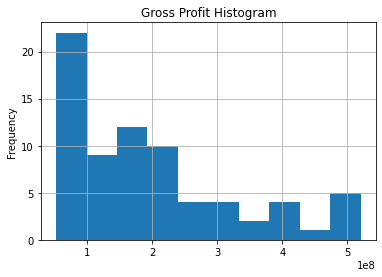


MENU
1. Calculate relationship between budget and its effect average movie rating
2. Compare the means of gross profit by genre
3. Compare average average movie rating of PG-13 mpaa versus PG mpaa
4. Create a histogram
5. Create a box plot
6. Output the average of budget, gross, runtime, and rating count to Excel
7. View average movie ratings by mpaa rating
8. View average movie ratings that have an 8 or higher
9. Quit


What is your choice:  5



Create a box plot
Categories
['release year', 'mpaa rating','genre']


Enter the category to graph:  release year


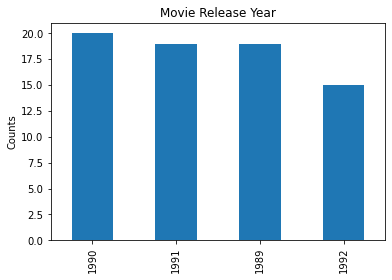


MENU
1. Calculate relationship between budget and its effect average movie rating
2. Compare the means of gross profit by genre
3. Compare average average movie rating of PG-13 mpaa versus PG mpaa
4. Create a histogram
5. Create a box plot
6. Output the average of budget, gross, runtime, and rating count to Excel
7. View average movie ratings by mpaa rating
8. View average movie ratings that have an 8 or higher
9. Quit


What is your choice:  3



Compare average average movie rating of PG-13 mpaa versus PG mpaa
This is a test of equal variances with Ho: The variances are equal
The t test statistic is 1.179 and the p-value is 0.2776
Conclusion: Fail to Reject Ho: We can't reject that the variances are the same
Ttest_indResult(statistic=-1.1140055460246396, pvalue=0.27192609868672024)
This is a Two-Sample t test (assuming equal variances) of equal means with Ho: The group means are equal
The t test statistic is -1.114 and the p-value is 0.2719
Conclusion: Fail to Reject Ho: We can't reject that the means are the same


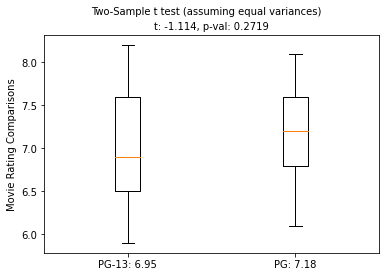


MENU
1. Calculate relationship between budget and its effect average movie rating
2. Compare the means of gross profit by genre
3. Compare average average movie rating of PG-13 mpaa versus PG mpaa
4. Create a histogram
5. Create a box plot
6. Output the average of budget, gross, runtime, and rating count to Excel
7. View average movie ratings by mpaa rating
8. View average movie ratings that have an 8 or higher
9. Quit


In [ ]:
def runMenu(df_1):
    quit = False
    while quit == False:
        print("\nMENU")
        print("1. Calculate relationship between budget and its effect average movie rating")
        print("2. Compare the means of gross profit by genre")
        print("3. Compare average average movie rating of PG-13 mpaa versus PG mpaa")
        print("4. Create a histogram")
        print("5. Create a box plot")
        print("6. Output the average of budget, gross, runtime, and rating count to Excel")
        print("7. View average movie ratings by mpaa rating")
        print("8. View average movie ratings that have an 8 or higher")
        print("9. Quit")
        menu_choice = input("What is your choice: ")
        try:
            menu_choice = int(menu_choice) 
        except: 
            print("ERROR: Please enter 1, 2, 3, 4, 5, 6, 7, 8, 9 or 10")
            continue 
        if menu_choice not in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
            print("ERROR: Please enter 1, 2, 3, 4, 5, 6, 7, 8, 9 or 10")
        else:
            if menu_choice == 1:
        #regression
                print("\nCalculate relationship between budget and its effect average movie rating")
                model1 = ols("budget ~ average_movie_rating",data=df_1).fit()
                print(model1.summary())
                xvar = 'budget'
                yvar = 'average_movie_rating'
                model = model1
                print('Coefficients: ') #Parameters
                print(model.params)
                intercept = model.params[0]
                slope = model.params[1]
                print('Coeff X1: ', slope)
                r2 = model.rsquared
                print('R2: ', r2)
                print('F Test Statistic: ', model.fvalue)
                reg_p_val = model.f_pvalue
                print('p-value: ',reg_p_val)
                print('t Test Statistics: ')
                print(model.tvalues)
                print('t p-values: ')
                print(model.pvalues)
                if np.sign(slope) < 1:
                    slsign = ""
                else:
                    slsign = "+"
                regeq = f"{yvar} = {round(intercept,3)} {slsign} {round(slope,3)} {xvar}"
                print(regeq)
                x=df_1[xvar]
                y=df_1[yvar]
                plt.scatter(x,y,color='black')
                xyCorr = round(x.corr(y),3)
                plt.suptitle(f"Correlation: {xyCorr}  R-Squared: {round(r2,4)}  p-value: {round(reg_p_val,4)}")
                plt.title(regeq, size=10)
                predict_y = intercept + slope * x
                #predict_y = model.predict() equivalent
                plt.plot(x,predict_y,'r-')
                plt.xlabel(xvar)
                plt.ylabel(yvar)
                plt.show()
                resid = model.resid
                predict_y = model.predict()
                plt.scatter(predict_y, resid)
                plt.suptitle(regeq)
                plt.hlines(0,3.1,4.5) #horizontal line at 0 error
                plt.ylabel('Residuals')
                plt.xlabel('Predicted ' + yvar)
                plt.show()
                
        #ANOVA
            if menu_choice == 2:
                print("\nCompare the means of gross profit by genre") 
                Romance = df_1[df_1['genre']=='Romance']
                Action = df_1[df_1['genre']=='Action']
                Comedy = df_1[df_1['genre']=='Comedy']
                Family = df_1[df_1['genre']=='Family']
                stats.f_oneway(Romance['gross'], Action['gross'], Comedy['gross'], Family['gross'])
                f, f_p_val = stats.f_oneway(Romance['gross'], Action['gross'], Comedy['gross'], Family['gross'])
                alpha = .05
                print("This is a test of equal means with Ho: The means of all groups are equal/Ha: At least one group mean is different")
                print(f"The F test statistic is {round(f,3)} and the p-value is {round(f_p_val,4)}")
                if f_p_val < alpha:
                    print("Conclusion: Reject Ho: At least one group mean is different")
                    ANOVA_type = "ANOVA: At least one group mean different"
                else:
                    print("Conclusion: Fail to Reject Ho: We can't reject that the means are the same")
                    ANOVA_type = "ANOVA: Group Means are the same"
                y=[Romance['gross'], Action['gross'], Comedy['gross'], Family['gross']]
                plt.boxplot(y)
                plt.title(f'F: {round(f,3)}, p-val: {round(f_p_val,4)}',size=10)
                plt.suptitle(ANOVA_type,size=10)
                plt.xticks(range(1,5),[f"Romance: {round(Romance['gross'].mean(),2)}",
                                           f"Action: {round(Action['gross'].mean(),2)}",
                                           f"Comedy: {round(Comedy['gross'].mean(),2)}",
                                           f"Family: {round(Family['gross'].mean(),2)}"])
                plt.xlabel('Tukey Result:Family genre differs in gross profit from the rest of the genres')
                plt.ylabel('Average Gross')
                plt.show()
                
        #t-test
            if menu_choice == 3:
                print("\nCompare average average movie rating of PG-13 mpaa versus PG mpaa") 
                PG13=df_1[df_1['mpaa_rating']=='PG-13']
                PG=df_1[df_1['mpaa_rating']=='PG']
                alpha = .05
                t_var, p_val_var= stats.bartlett(PG13['average_movie_rating'],PG['average_movie_rating'])
                print("This is a test of equal variances with Ho: The variances are equal")
                print(f"The t test statistic is {round(t_var,3)} and the p-value is {round(p_val_var,4)}")
                if p_val_var < alpha:
                    print("Conclusion: Reject Ho: The variances are not equal")
                    t_eq_var=False
                    t_type='Welch (unequal variances) Two-Sample t test'
                else:
                    print("Conclusion: Fail to Reject Ho: We can't reject that the variances are the same")
                    t_eq_var=True
                    t_type='Two-Sample t test (assuming equal variances)'     
                print(stats.ttest_ind(PG13['average_movie_rating'],PG['average_movie_rating'],equal_var=t_eq_var))
                alpha = .05
                t_mean, p_val_mean = stats.ttest_ind(PG13['average_movie_rating'],PG['average_movie_rating'],equal_var=t_eq_var)
                print(f"This is a {t_type} of equal means with Ho: The group means are equal")
                print(f"The t test statistic is {round(t_mean,3)} and the p-value is {round(p_val_mean,4)}")
                if p_val_mean < alpha:
                    print("Conclusion: Reject Ho: The means are not equal")
                else:
                    print("Conclusion: Fail to Reject Ho: We can't reject that the means are the same")
                y=[PG13['average_movie_rating'],PG['average_movie_rating']]
                plt.boxplot(y)
                plt.title(f't: {round(t_mean,3)}, p-val: {round(p_val_mean,4)}',size=10)
                plt.suptitle(t_type,size=10)
                plt.xticks(range(1,3),[f"PG-13: {round(PG13['average_movie_rating'].mean(),2)}",
                                           f"PG: {round(PG['average_movie_rating'].mean(),2)}"])
                plt.ylabel('Movie Rating Comparisons')
                plt.show()
           
        #subfilter
            if menu_choice == 4:
                print("\nCreate a histogram")
                print("['budget', 'gross', 'runtime']")
                menu_choice = input("Enter the column to graph: ")
                if menu_choice not in ['budget', 'gross', 'runtime']:
                    print("ERROR: Please enter a column")
                else:
                    if menu_choice == 'budget':
                        df_1['budget'].hist()
                        plt.title(f"Budget Histogram")
                        plt.ylabel("Frequency")
                        plt.show()
                    elif menu_choice == 'gross':
                        df_1['gross'].hist()
                        plt.title(f"Gross Profit Histogram")
                        plt.ylabel("Frequency")
                        plt.show()
                    elif menu_choice == 'runtime':
                        df_1['runtime'].hist()
                        plt.title(f"Runtime Histogram")
                        plt.ylabel("Frequency")
                        plt.show()
           
        #subfilter
            if menu_choice == 5:
                print("\nCreate a box plot") 
                print("Categories")
                print("['release year', 'mpaa rating','genre']")
                menu_choice = input("Enter the category to graph: ")
                if menu_choice not in ['release year', 'mpaa rating','genre']:
                    print("ERROR: Please enter a category")
                else:
                    if menu_choice == 'release year':
                        df_1['release_year'].value_counts().plot.bar()
                        plt.title(f"Movie Release Year")
                        plt.ylabel("Counts")
                        plt.show()
                    elif menu_choice == 'mpaa rating':
                        df_1['mpaa_rating'].value_counts().plot.bar()
                        plt.title(f"Movie Mpaa_rating")
                        plt.ylabel("Counts")
                        plt.show()
                    elif menu_choice == 'genre':
                        df_1['genre'].value_counts().plot.bar()
                        plt.title(f"Movie Genre")
                        plt.ylabel("Counts")
                        plt.show()
           
        #output to excel
            if menu_choice == 6:
                print("\nOutput the average of budget, gross, and runtime to Excel") 
                df_Quant = df_1[['budget','gross','runtime']]
                xw.apps.add() 
                wb = xw.Book() 
                sht = wb.sheets['Sheet1']
                sht.range((2,1)).value = 'Average'
                sht.range((3,1)).value = 'Min'
                sht.range((4,1)).value = 'Max'
                sht.range('B1').value = 'budget'
                sht.range('C1').value = 'gross'
                sht.range('D1').value = 'runtime'
                sht.range('B2').value = df_Quant['budget'].mean()
                sht.range('C2').value = df_Quant['gross'].mean()
                sht.range('D2').value = df_Quant['runtime'].mean()
                sht.range('B3').value = df_Quant['budget'].min()
                sht.range('C3').value = df_Quant['gross'].min()
                sht.range('D3').value = df_Quant['runtime'].min()
                sht.range('B4').value = df_Quant['budget'].max()
                sht.range('C4').value = df_Quant['gross'].max()
                sht.range('D4').value = df_Quant['runtime'].max()
                chart = sht.charts.add(left=0, top=100, width=355, height=211)
                chart.set_source_data(sht.range('A1:D4'))
                wb.save(r'MovieData.xlsx')
           
        #subfilter
            if menu_choice == 7:
                print("\nView average movie ratings by mpaa rating") 
                print("These are the mpaa_ratings")
                print("['PG', 'PG-13', 'R']")
                loc_choice = input("Enter the mpaa_rating to view: ")
                if loc_choice not in ['PG', 'PG-13', 'R']:
                    print("ERROR: Please enter a mpaa type")
                else:
                    if loc_choice == 'PG':
                        print(df_1[df_1['mpaa-rating']=='PG'])

                    elif loc_choice == 'PG-13':
                        print(df1[df1['mpaa_rating']=='PG-13'])

                    elif loc_choice == 'R':
                        print(df1[df1['mpaa_rating']=='R'])

            if menu_choice == 8:
                print("\nView average movie ratings that have an 8 or higher") 
                print(df_1[df_1['average_movie_rating']>8])
                
            if menu_choice == 9:
                quit = True

runMenu(df_1)

<font size="10">
REPORT 

<font size="5">
Research Questions: 

<font size="3">
Research Q1: As budget increases, does average movie rating increase?

<font size="3">
Research Q2: Is there a significant difference in average movie ratings based on genre?

<font size="3">
Research Q3: As runtime increases, does average movie rating increase?

<font size="2">
QUESTION 1


Calculate relationship between budget and its effect average movie rating
                            OLS Regression Results                            
Dep. Variable:                 budget   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                   0.06222
Date:                Sat, 13 Mar 2021   Prob (F-statistic):              0.804
Time:                        21:03:11   Log-Likelihood:                -1320.8
No. Observations:                  73   AIC:                             2646.
Df Residuals:                      71   BIC:                             2650.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

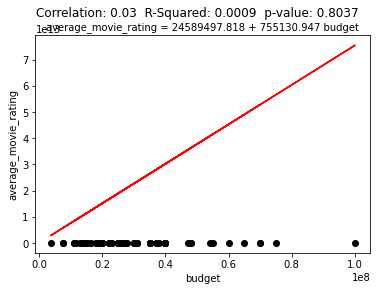

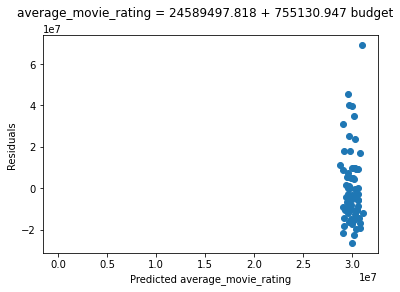

In [12]:
#Research Q1
print("\nCalculate relationship between budget and its effect average movie rating")
model1 = ols("budget ~ average_movie_rating",data=df_1).fit()
print(model1.summary())
xvar = 'budget'
yvar = 'average_movie_rating'
model = model1
print('Coefficients: ') #Parameters
print(model.params)
intercept = model.params[0]
slope = model.params[1]
print('Coeff X1: ', slope)
r2 = model.rsquared
print('R2: ', r2)
print('F Test Statistic: ', model.fvalue)
reg_p_val = model.f_pvalue
print('p-value: ',reg_p_val)
print('t Test Statistics: ')
print(model.tvalues)
print('t p-values: ')
print(model.pvalues)
if np.sign(slope) < 1:
    slsign = ""
else:
    slsign = "+"
regeq = f"{yvar} = {round(intercept,3)} {slsign} {round(slope,3)} {xvar}"
print(regeq)
x=df_1[xvar]
y=df_1[yvar]
plt.scatter(x,y,color='black')
xyCorr = round(x.corr(y),3)
plt.suptitle(f"Correlation: {xyCorr}  R-Squared: {round(r2,4)}  p-value: {round(reg_p_val,4)}")
plt.title(regeq, size=10)
predict_y = intercept + slope * x
#predict_y = model.predict() equivalent
plt.plot(x,predict_y,'r-')
plt.xlabel(xvar)
plt.ylabel(yvar)
plt.show()
resid = model.resid
predict_y = model.predict()
plt.scatter(predict_y, resid)
plt.suptitle(regeq)
plt.hlines(0,3.1,4.5) #horizontal line at 0 error
plt.ylabel('Residuals')
plt.xlabel('Predicted ' + yvar)
plt.show()                

<font size="2">
QUESTION 1 CONCLUSION:

By looking at this scatterplot along with the R-squared statistic, my conclusion is that there is not a corrrelation between the movie's budget to the movie's average movie rating. The R-squared statistic is 0.001 which means it is extremely close to 0.00. When our R-squared is close to 0, it means that there is no relationship between these two variables. In conclusion, if budget were to increase, it does not mean that the movie's average movie rating will increase as well. Thinking about it realistically, it also makes sense that if a movie received a huge budget, there are no promises that the movie will do well. This also could just be the lack of a large database to view the correlation. 

<font size="2">
QUESTION 2

The groups are Romance and Comedy and Action and Family
This is a test of equal means with Ho: The means of all groups are equal/Ha: At least one group mean is different
The F test statistic is 3.601 and the p-value is 0.0177
Conclusion: Reject Ho: At least one group mean is different


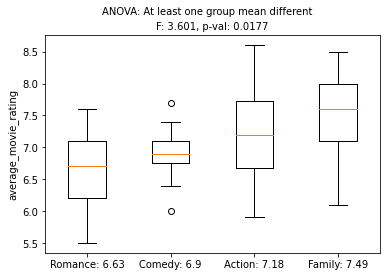

Ho: The group means are equal
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
Action  Comedy  -0.2806 0.5059   -0.81  0.2489  False
Action  Family   0.3128  0.412 -0.2166  0.8422  False
Action Romance   -0.552 0.1827 -1.2636  0.1596  False
Comedy  Family   0.5933 0.0716 -0.0357  1.2224  False
Comedy Romance  -0.2714 0.7773   -1.06  0.5171  False
Family Romance  -0.8648 0.0261 -1.6533 -0.0762   True
-----------------------------------------------------


C:\Users\yentr\anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


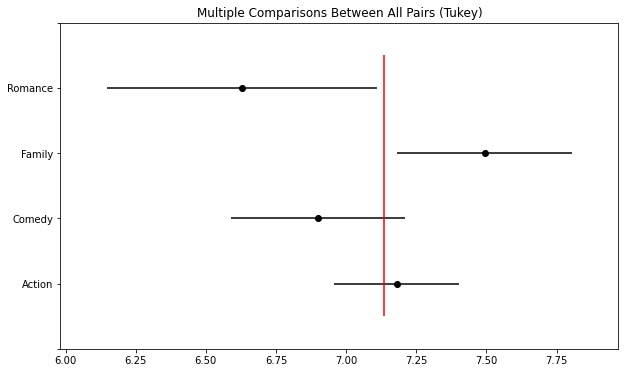

In [23]:
#Research Q2
StatTests.MeansTest(df_1,'genre','average_movie_rating')

<font size="2">
QUESTION 2 CONCLUSION:

In this case, there is a significant difference in average movie ratings based on the various genres. We can conclude that at least one group mean is different. Then, we can confirm our conclusion by looking at the box plots and tukey plot. As we can see, the box plots vary from size, length, mean, etc. The comedy box plot is relatively short when comparing it to the other genres which could mean that the ratings were more in agreement with each other whereas the tall box plots like romance, action, and family could have had varying opinions on the movies within the genre. Our lowest mean rating within a genre is romance with a 6.63 and our highest is a 7.49 in the family genre. Looking at it overall, based on the genre, the average movie rating does seem to differ significantly. With that being said, we might want to conduct more research into what factors play a part of impacting the movie rating within each genre. 

<font size="2">
QUESTION 3


Calculate relationship between runtime and its effect average movie rating
                             OLS Regression Results                             
Dep. Variable:     average_movie_rating   R-squared:                       0.073
Model:                              OLS   Adj. R-squared:                  0.060
Method:                   Least Squares   F-statistic:                     5.579
Date:                  Sat, 13 Mar 2021   Prob (F-statistic):             0.0209
Time:                          21:37:31   Log-Likelihood:                -73.108
No. Observations:                    73   AIC:                             150.2
Df Residuals:                        71   BIC:                             154.8
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

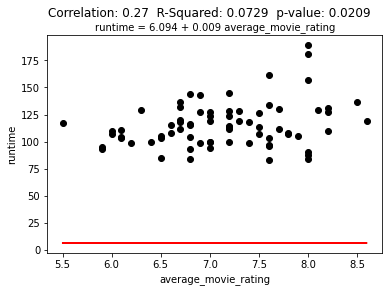

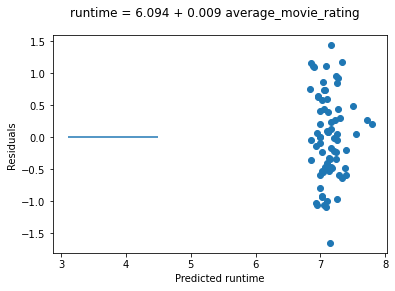

In [26]:
print("\nCalculate relationship between runtime and its effect average movie rating")
model2 = ols("average_movie_rating ~ runtime",data=df_1).fit()
print(model2.summary())
xvar = 'average_movie_rating'
yvar = 'runtime'
model = model2
print('Coefficients: ') #Parameters
print(model.params)
intercept = model.params[0]
slope = model.params[1]
print('Coeff X1: ', slope)
r2 = model.rsquared
print('R2: ', r2)
print('F Test Statistic: ', model.fvalue)
reg_p_val = model.f_pvalue
print('p-value: ',reg_p_val)
print('t Test Statistics: ')
print(model.tvalues)
print('t p-values: ')
print(model.pvalues)
if np.sign(slope) < 1:
    slsign = ""
else:
    slsign = "+"
regeq = f"{yvar} = {round(intercept,3)} {slsign} {round(slope,3)} {xvar}"
print(regeq)
x=df_1[xvar]
y=df_1[yvar]
plt.scatter(x,y,color='black')
xyCorr = round(x.corr(y),3)
plt.suptitle(f"Correlation: {xyCorr}  R-Squared: {round(r2,4)}  p-value: {round(reg_p_val,4)}")
plt.title(regeq, size=10)
predict_y = intercept + slope * x
#predict_y = model.predict() equivalent
plt.plot(x,predict_y,'r-')
plt.xlabel(xvar)
plt.ylabel(yvar)
plt.show()
resid = model.resid
predict_y = model.predict()
plt.scatter(predict_y, resid)
plt.suptitle(regeq)
plt.hlines(0,3.1,4.5) #horizontal line at 0 error
plt.ylabel('Residuals')
plt.xlabel('Predicted ' + yvar)
plt.show()  

<font size="2">
QUESTION 3 CONCLUSION:

By looking at the graphical representation of this regression test, I can conclude that there is no direct correlation between the runtime of a movie and its' average movie rating. That is because the average movie rating coefficient is at 0.009. If the runtime were to increase by 6 minutes, the movie rating would barely increase. Also, the plot does not show a clear negative or positive slope, but is just scattered around through the graph. Comparing it to my first research question that looked at budget and movie rating, the R-Squared was almost close to 0 which means no correlation. This test shows a higher R-squared of 0.073, but still very low. As for my p-value, it shows a  value of 0.02 which is lower than alpha(0.05). If the null hypothesis were to say there was no relationship between the two variables (runtime and average movie rating), we would reject the null hypothesis as our p-value indicates that the data is statistcally significant. More tests would have to be done to understand the relationship between these two variables. 

<font size="5">
FINAL CONCLUSIONS:

From the data analysis, there can be a lot of factors that impact the overall average movie rating. I focused on mainly the average movie rating, and then used variables like genre, budget, gross,mpaa rating, runtime, etc to see if it would increase or decrease the movie rating. From my research, it seems that budget and gross do not illustrate a change within the movie rating whereas genre does. Based on the genre, the average movie rating can significantly change. For example, the romance genre was not lacking any data, but the rating is much lower that the average rating of the family genre. In addition, I found the menu option 3 especially interesting as it examined if the mpaa rating impacted the movie ratings. From the box plot, PG movies seemed to have an overall higher rating than PG-13 movies. I would have to do more research to see if the same would go for rated R movies as well. Even though I found some valuable conclusions today, there would need to be more research and data to fully understand what other factors impacts the movie rating. 